<a href="https://colab.research.google.com/github/Blutronics/OffensiveTwitterDetection/blob/main/OffensiveDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sys
from streamlit import cli as stcli

2022-08-07 00:19:17.981 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


In [3]:
import numpy as np
import pandas as pd
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,r2_score
import xgboost as xgb
import lightgbm as gbm
import streamlit as st

In [4]:
data=pd.read_csv("twitter.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
classdf=data[['class','tweet']]
classdf.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
tweets=classdf.tweet.to_string()

In [7]:
tweets = re.sub("[^A-Za-z" "]+"," ", tweets).lower()
tweets = re.sub("[0-9" "]+"," ", tweets)

In [8]:
class2df=classdf.loc[classdf['class']==2]
class2df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,2,""" momma said no pussy cats inside my doghouse """
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


In [9]:
offensivedf=classdf.loc[classdf['class']==1]
offensivedf.head()

,class,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [10]:
hatedf=classdf.loc[classdf['class']==0]
hatedf.head()

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [11]:
offensivetweets=offensivedf.tweet.to_string()


In [12]:
offensivetweets = re.sub("[^A-Za-z" "]+"," ", offensivetweets).lower()
offensivetweets = re.sub("[0-9" "]+"," ", offensivetweets)

In [13]:
offensivetweets = offensivetweets.split(" ")
offensivetweets

['',
 'rt',
 'mleew',
 'boy',
 'dats',
 'cold',
 'tyga',
 'dwn',
 'ba',
 'rt',
 'urkindofbrand',
 'dawg',
 'rt',
 'sbaby',
 'rt',
 'c',
 'g',
 'anderson',
 'viva',
 'based',
 'she',
 'lo',
 'rt',
 'shenikaroberts',
 'the',
 'shit',
 'you',
 't',
 'madison',
 'x',
 'the',
 'shit',
 'just',
 'brighterdays',
 'i',
 'can',
 'not',
 'just',
 'sit',
 'up',
 'selfiequeenbri',
 'cause',
 'i',
 'm',
 'tired',
 'of',
 'amp',
 'you',
 'might',
 'not',
 'get',
 'ya',
 'bitch',
 'back',
 'amp',
 'rhythmixx',
 'hobbies',
 'include',
 'fighting',
 'maria',
 'keeks',
 'is',
 'a',
 'bitch',
 'she',
 'curves',
 'everyone',
 'lol',
 'i',
 'murda',
 'gang',
 'bitch',
 'its',
 'gang',
 'land',
 'so',
 'hoes',
 'that',
 'smoke',
 'are',
 'losers',
 'yea',
 'go',
 'bad',
 'bitches',
 'is',
 'the',
 'only',
 'thing',
 'that',
 'i',
 'like',
 'bitch',
 'get',
 'up',
 'off',
 'me',
 'bitch',
 'nigga',
 'miss',
 'me',
 'with',
 'it',
 'bitch',
 'plz',
 'whatever',
 'bitch',
 'who',
 'do',
 'you',
 'love',
 'bitc

In [14]:
hatespeachtweets=hatedf.tweet.to_string()


In [15]:
hatespeachtweets = re.sub("[^A-Za-z" "]+"," ", hatespeachtweets).lower()
hatespeachtweets = re.sub("[0-9" "]+"," ", hatespeachtweets)

In [16]:
hatespeachtweets = hatespeachtweets.split(" ")

In [17]:
#hatespeachtweets

In [18]:
vectorizer = TfidfVectorizer()
offensive = vectorizer.fit_transform(offensivetweets)

In [19]:
with open("stop.txt","r") as sw:
    stop_words = sw.read()

In [20]:
stop_words = stop_words.split("\n")

In [21]:
stop_words.extend(["rt","a"])

In [22]:
offensivetweets = [w for w in offensivetweets if not w in stop_words]


In [23]:
offensivetweets = " ".join(offensivetweets)

In [24]:

wordcloud_offensive = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(offensivetweets)

In [25]:
offensivetweets

' mleew boy dats cold tyga dwn ba urkindofbrand dawg sbaby anderson viva based lo shenikaroberts shit madison shit brighterdays sit selfiequeenbri tired amp ya bitch back amp rhythmixx hobbies include fighting maria keeks bitch curves lol murda gang bitch gang land hoes smoke losers yea bad bitches thing bitch bitch nigga miss bitch plz bitch love bitches cut everyday black bottle amp bad bitch broke bitch cancel bitch nino hoes wont change fuck bitch dont suck dick ya bitch tip toeing hardwood floor pussy lips heaven doors hoe hitting met pussy ocean dr gave trippy bitch fuck hennessy spend money bitch bus txt bitch bitch pussy wetter im back bit aint bout murder game pussy nigg toes ain pussy stinks im bitter bitches wrap ya bitch aint cut bitch jus meet son ya mane ass bitches lames crying hoes tears clown snoop dont love hoes hated hoes favorite mw sev nice girls bad make naughty bad yel pimps pimps hoes future voice post picture pussy likes pussy powerful drug happyh quick piece p

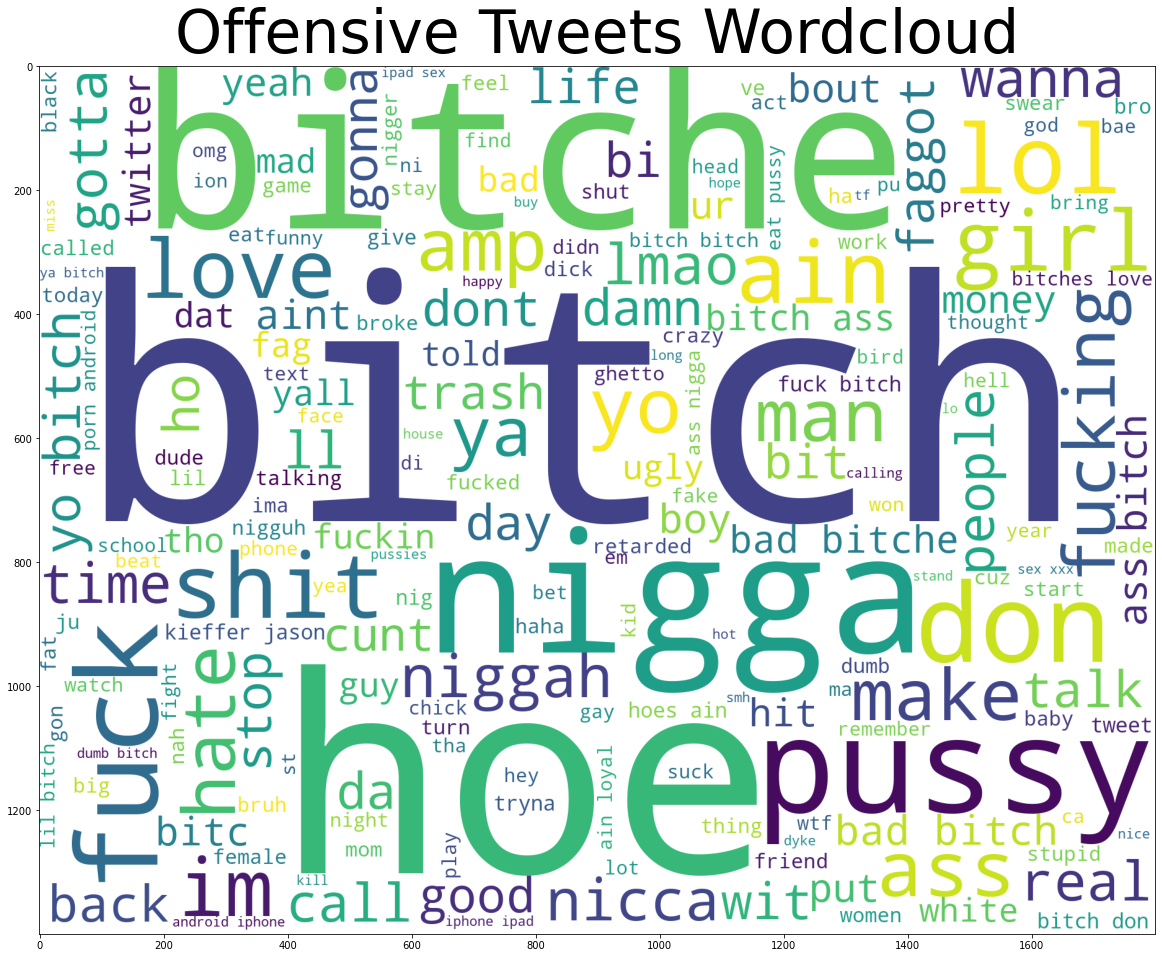

In [26]:
plt.figure(figsize=(20,20))
plt.title("Offensive Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_offensive)

In [27]:
offensivetweets = offensivetweets.split(" ")

In [28]:
letter_counts = Counter(offensivetweets)
letter_counts.pop('')


1

In [29]:
most_offensive = letter_counts.most_common(30)
most_offensive

[('bitch', 4601),
 ('bitches', 1784),
 ('hoes', 1377),
 ('pussy', 1059),
 ('hoe', 1027),
 ('don', 714),
 ('fuck', 696),
 ('ass', 619),
 ('nigga', 524),
 ('ain', 505),
 ('shit', 440),
 ('niggas', 418),
 ('lol', 407),
 ('yo', 406),
 ('love', 364),
 ('bad', 347),
 ('http', 298),
 ('im', 282),
 ('hate', 282),
 ('ya', 240),
 ('fucking', 236),
 ('amp', 231),
 ('man', 222),
 ('good', 206),
 ('real', 204),
 ('make', 197),
 ('girl', 197),
 ('niggah', 178),
 ('wit', 176),
 ('wanna', 173)]

In [30]:
hatespeachtweets = [w for w in hatespeachtweets if not w in stop_words]

In [31]:
hatespeachtweets = " ".join(hatespeachtweets)

In [32]:
wordcloud_hate = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(hatespeachtweets)

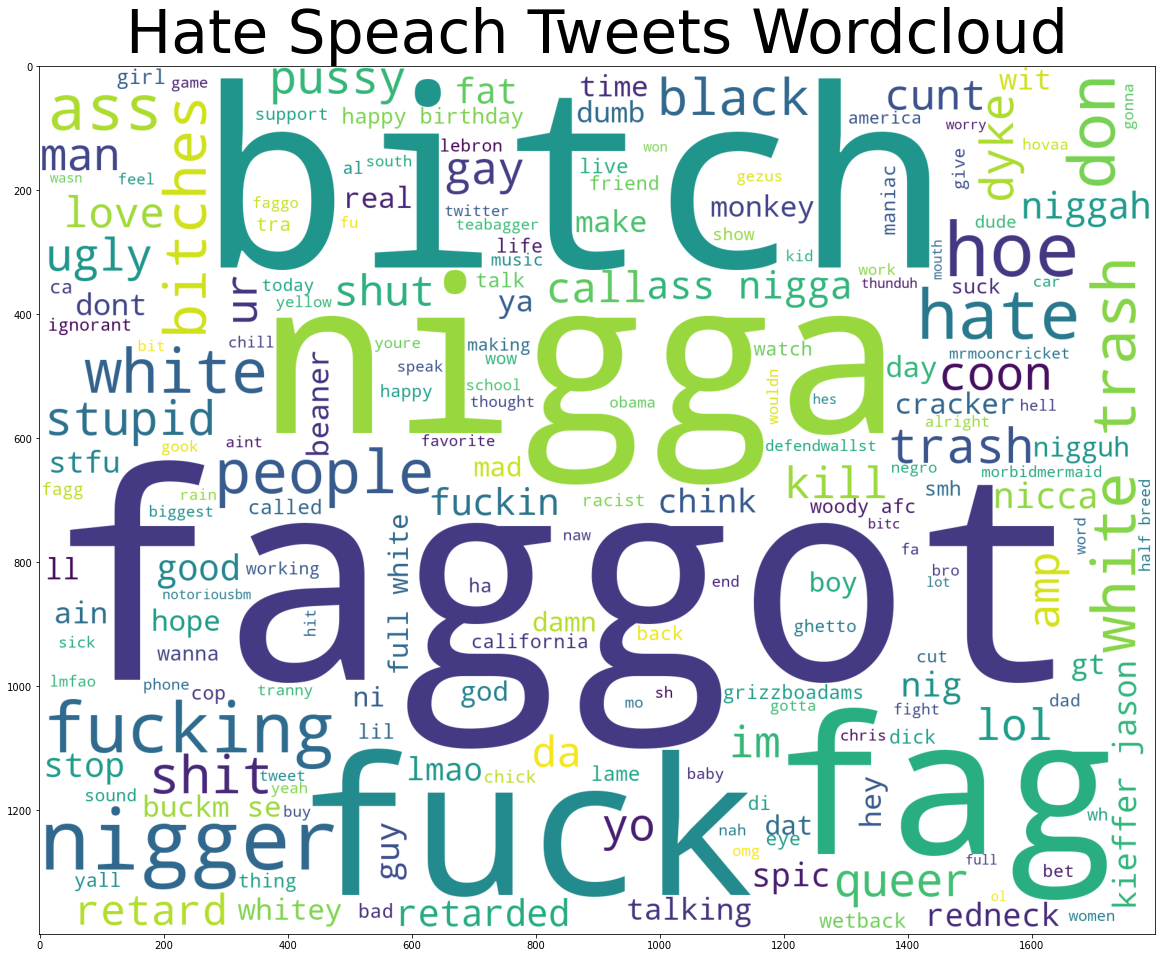

In [33]:
plt.figure(figsize=(20,20))
plt.title("Hate Speach Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_hate)


In [34]:
hatespeachtweets = hatespeachtweets.split(" ")

In [35]:
letter_counts2 = Counter(hatespeachtweets)
letter_counts2.pop('')

2

In [36]:
most_hate = letter_counts2.most_common(30)
most_hate

[('faggot', 102),
 ('bitch', 98),
 ('white', 75),
 ('fuck', 73),
 ('nigga', 60),
 ('ass', 54),
 ('trash', 54),
 ('fag', 51),
 ('niggas', 50),
 ('nigger', 48),
 ('fucking', 46),
 ('hate', 43),
 ('don', 39),
 ('people', 34),
 ('faggots', 31),
 ('bitches', 30),
 ('hoes', 29),
 ('http', 28),
 ('hoe', 25),
 ('shit', 23),
 ('fags', 22),
 ('black', 21),
 ('niggers', 20),
 ('stupid', 20),
 ('pussy', 19),
 ('man', 18),
 ('ugly', 18),
 ('yo', 18),
 ('gay', 17),
 ('kill', 17)]

In [37]:
def countOccurrences(str, word, listword):
     
    # split the string by spaces in a
    a = str.split(" ")
    # search for pattern in a
    count = 0
    # for i in range(1000):
    for i in range(0, len(a)):
        
        # if match found increase count
        # print(a[i])
      if (word == a[i]):
          count = count + 1
    if count > 0:
      listword.append(1)
    else:
      listword.append(0)
            
    return count, listword

In [38]:
bitch = []
# for i in range(12):
for i in range(24783):
  count, bitch = countOccurrences(classdf.tweet[i],"bitch", bitch)
  

In [39]:
bitches = []
# for i in range(12):
for i in range(24783):
  count, bitches = countOccurrences(classdf.tweet[i],"bitches", bitches)
  

In [40]:
hoes = []
# for i in range(12):
for i in range(24783):
  count, hoes = countOccurrences(classdf.tweet[i],"hoes", hoes)
  

In [41]:
pussy = []
# for i in range(12):
for i in range(24783):
  count, pussy = countOccurrences(classdf.tweet[i],"pussy", pussy)
  

In [42]:
hoe = []
# for i in range(12):
for i in range(24783):
  count, hoe = countOccurrences(classdf.tweet[i],"hoe", hoe)
  

In [43]:
fuck = []
# for i in range(12):
for i in range(24783):
  count, fuck = countOccurrences(classdf.tweet[i],"fuck", fuck)
  

In [44]:
ass = []
# for i in range(12):
for i in range(24783):
  count, ass = countOccurrences(classdf.tweet[i],"ass", ass)

In [45]:
niggah = []
# for i in range(12):
for i in range(24783):
  count, niggah = countOccurrences(classdf.tweet[i],"niggah", niggah)

In [46]:
nigga = []
# for i in range(12):
for i in range(24783):
  count, nigga = countOccurrences(classdf.tweet[i],"nigga", nigga)

In [47]:
shit = []
# for i in range(12):
for i in range(24783):
  count, shit = countOccurrences(classdf.tweet[i],"shit", shit)

In [48]:
niggas = []
# for i in range(12):
for i in range(24783):
  count, niggas = countOccurrences(classdf.tweet[i],"niggas", niggas)

In [49]:
nigger = []
# for i in range(12):
for i in range(24783):
  count, nigger = countOccurrences(classdf.tweet[i],"nigger", nigger)

In [50]:
gay = []
# for i in range(12):
for i in range(24783):
  count, gay = countOccurrences(classdf.tweet[i],"gay", gay)

In [51]:
ugly = []
# for i in range(12):
for i in range(24783):
  count, ugly = countOccurrences(classdf.tweet[i],"ugly", ugly)

In [52]:
#create a new dataframe counting each frequent word for each tweet(row)
#most frequent word= column

In [53]:
encodedDf = pd.DataFrame(bitch)

In [54]:
encodedDf

,0
0,0
1,0
2,1
3,0
4,1
...,...
24778,0
24779,0
24780,0
24781,0


In [55]:
encodedDf.rename(columns = {0:"Bitch"},inplace=True)

In [56]:
encodedDf["Bitches"] = bitches

In [57]:
encodedDf["Hoes"] = hoes

In [58]:
encodedDf["Pussy"] = pussy

In [59]:
encodedDf["Hoe"] = hoe

In [60]:
encodedDf["Fuck"] = fuck

In [61]:
encodedDf["Ass"] = ass

In [62]:
encodedDf["Nigga"] = nigga

In [63]:
encodedDf["Shit"] = shit

In [64]:
encodedDf["Niggas"] = niggas

In [65]:
encodedDf["Nigger"] = nigger

In [66]:
#encodedDf["Niggah"] = niggah

In [67]:
encodedDf["Gay"] = gay

In [68]:
encodedDf["Ugly"] = ugly

In [69]:
encodedDf

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,Nigger,Gay,Ugly
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,0,0,0,0,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,0,0,0,0
24781,0,1,0,0,0,0,0,0,0,0,0,0,0


In [70]:
faggot = []
for i in range(24783):
  count, faggot = countOccurrences(classdf.tweet[i],"faggot", faggot)
  

In [71]:
bitch = []
for i in range(24783):
  count, bitch = countOccurrences(classdf.tweet[i],"bitch", bitch)

In [72]:
fuck = []
for i in range(24783):
  count, fuck = countOccurrences(classdf.tweet[i],"fuck", fuck)

In [73]:
nigga = []
for i in range(24783):
  count, nigga = countOccurrences(classdf.tweet[i],"nigga", nigga)

In [74]:
ass = []
for i in range(24783):
  count, ass = countOccurrences(classdf.tweet[i],"ass", ass)

In [75]:
fag = []
for i in range(24783):
  count, fag = countOccurrences(classdf.tweet[i],"fag", fag)

In [76]:
niggas = []
for i in range(24783):
  count, niggas = countOccurrences(classdf.tweet[i],"niggas", niggas)

In [77]:
fucking = []
for i in range(24783):
  count, fucking = countOccurrences(classdf.tweet[i],"fucking", fucking)

In [78]:
faggots = []
for i in range(24783):
  count, faggots = countOccurrences(classdf.tweet[i],"faggots", faggots)

In [79]:
white = []
for i in range(24783):
  count, white = countOccurrences(classdf.tweet[i],"white", white)

In [80]:
trash = []
for i in range(24783):
  count, trash = countOccurrences(classdf.tweet[i],"trash", trash)

In [81]:
love = []
for i in range(24783):
  count, love = countOccurrences(classdf.tweet[i],"love", love)

In [82]:
real = []
for i in range(24783):
  count, real = countOccurrences(classdf.tweet[i],"real", real)

In [83]:
good = []
for i in range(24783):
  count, good = countOccurrences(classdf.tweet[i],"good", good)

In [84]:
black = []
for i in range(24783):
  count, black = countOccurrences(classdf.tweet[i],"black", black)

In [85]:

encodedHateDF = pd.DataFrame(faggot)

In [86]:
encodedHateDF

,0
0,0
1,0
2,0
3,0
4,0
...,...
24778,0
24779,0
24780,0
24781,0


In [87]:
encodedHateDF.rename(columns = {0: "Faggot"}, inplace = True)

In [88]:
#encodedHateDF["Bitch"] = bitch

In [89]:
#encodedHateDF["Fuck"] = fuck

In [90]:
#encodedHateDF["Nigga"] = nigga

In [91]:
#encodedHateDF["Ass"] = ass

In [92]:
encodedHateDF["Fag"] = fag

In [93]:
#encodedHateDF["Niggas"] = niggas

In [94]:
encodedHateDF["Fucking"] = fucking

In [95]:
encodedHateDF["Faggots"] = faggots

In [96]:
encodedHateDF["White"] = white

In [97]:
encodedHateDF["Trash"] = trash

In [98]:
encodedHateDF["Love"] = love

In [99]:
encodedHateDF["Real"] = real

In [100]:
encodedHateDF["Good"] = good

In [101]:
encodedHateDF["Black"] = black

In [102]:
encodedHateDF

,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,1,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,0
24781,0,0,0,0,0,0,0,0,0,0


In [103]:
wordDF = pd.merge(encodedDf, encodedHateDF, left_index=True, right_index=True)

In [104]:
wordDF.head()

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
target = classdf["class"]

In [106]:
sm = SMOTE()
X,Y = sm.fit_resample(wordDF,target)

In [107]:
x_train,x_test,x_target_train,x_target_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=14)

In [108]:
#rfc=RandomForestClassifier(n_estimators= 250, max_depth=100)
#dtc=DecisionTreeClassifier()
#lr=LogisticRegression(max_iter=600)
#knnc=KNeighborsClassifier()
#svc=SVC()
#nb=GaussianNB()

In [109]:
#models = [("rfc",rfc),("dtc",dtc),("lr",lr),("knnc",knnc),("svc",svc),("nb",nb)]

In [110]:
#voting = VotingClassifier(models)

In [111]:
#voting.fit(x_train,x_target_train)

In [112]:
#x_pred = voting.predict(x_test)

In [113]:
#accuracy_score(x_target_test,x_pred)

In [114]:
#model = xgb.XGBClassifier()
#model.fit(x_train,x_target_train)

In [115]:
#x_pred = model.predict(x_test)

In [116]:
#accuracy_score(x_target_test,x_pred)

In [117]:
model = gbm.LGBMClassifier()

In [118]:
model.fit(x_train,x_target_train)

LGBMClassifier()

In [119]:
x_pred = model.predict(x_test)

In [120]:
accuracy_score(x_target_test,x_pred)

0.6968907417057495

In [121]:
st.write("""
# Twitter Offensive/Hate Speach Prediction App
This app predicts the **Tweet** type!
""")


2022-08-07 00:20:08.238 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [122]:
st.subheader('User Input Tweet')
user_input = st.text_input("input tweet")

In [123]:
st.write(user_input)

In [124]:
x_test

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
24133,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12631,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [125]:
#example=input()

In [126]:
user_inp_df={}
for i in wordDF.columns:
  word=[]
  count,word=countOccurrences(user_input,i.lower(),word)
  user_inp_df[i]=word
  #print(word)

user_inp_df

{'Bitch': [0],
 'Bitches': [0],
 'Hoes': [0],
 'Pussy': [0],
 'Hoe': [0],
 'Fuck': [0],
 'Ass': [0],
 'Nigga': [0],
 'Shit': [0],
 'Niggas': [0],
 'Nigger': [0],
 'Gay': [0],
 'Ugly': [0],
 'Faggot': [0],
 'Fag': [0],
 'Fucking': [0],
 'Faggots': [0],
 'White': [0],
 'Trash': [0],
 'Love': [0],
 'Real': [0],
 'Good': [0],
 'Black': [0]}

In [127]:
new_user_df=pd.DataFrame.from_dict(user_inp_df)
new_user_df.head()

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
prediction=model.predict(new_user_df)

In [129]:
prediction

array([2])

In [130]:
st.subheader('Prediction')
st.write(prediction)